In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
from PIL import Image

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


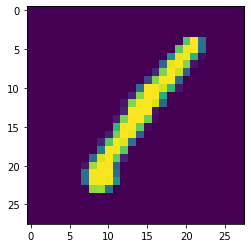

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DigitRecognizer/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DigitRecognizer/test.csv')

X = train.drop(columns='label').values.reshape((train.shape[0], 28, 28, 1))
Y = keras.utils.to_categorical(train['label'].values)

X_test = test.values.reshape((test.shape[0], 28, 28, 1))

plt.imshow(X[0][:,:,0])

In [ ]:
X = tf.image.grayscale_to_rgb(tf.constant(X))
X = tf.pad(X, ((0, 0), (2, 2), (2, 2), (0, 0)))

X_test = tf.image.grayscale_to_rgb(tf.constant(X_test))
X_test = tf.pad(X_test, ((0, 0), (2, 2), (2, 2), (0, 0)))

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

In [ ]:
base_model = VGG16(weights="imagenet", include_top=False, input_shape=X[0].shape)
base_model.trainable = False

train_ds = preprocess_input(X) 
test_ds = preprocess_input(X_test)

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
base_model.summary()

In [ ]:
from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(10, activation='softmax')


model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

In [ ]:
from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(10, activation='softmax')


model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

history = model.fit(X, Y, epochs=50, validation_split=0.2, batch_size=32, callbacks=[es])

Epoch 1/50
1050/1050 [==============================] - 453s 431ms/step - loss: 0.3151 - accuracy: 0.8975 - val_loss: 0.3426 - val_accuracy: 0.8943
Epoch 2/50
1050/1050 [==============================] - 454s 432ms/step - loss: 0.2396 - accuracy: 0.9212 - val_loss: 0.2612 - val_accuracy: 0.9242
Epoch 3/50
1050/1050 [==============================] - 453s 432ms/step - loss: 0.2096 - accuracy: 0.9315 - val_loss: 0.2661 - val_accuracy: 0.9149
Epoch 4/50
1050/1050 [==============================] - 452s 430ms/step - loss: 0.1862 - accuracy: 0.9407 - val_loss: 0.2215 - val_accuracy: 0.9317
Epoch 5/50
1050/1050 [==============================] - 445s 424ms/step - loss: 0.1759 - accuracy: 0.9433 - val_loss: 0.2520 - val_accuracy: 0.9238
Epoch 6/50
1050/1050 [==============================] - 447s 426ms/step - loss: 0.1614 - accuracy: 0.9477 - val_loss: 0.2130 - val_accuracy: 0.9348
Epoch 7/50
1050/1050 [==============================] - 449s 427ms/step - loss: 0.1536 - accuracy: 0.9500 - val_

In [ ]:
# function to monitor model performance in each epoch
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label = 'Training accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label = 'Validation accuracy')
    plt.legend()
    plt.show()

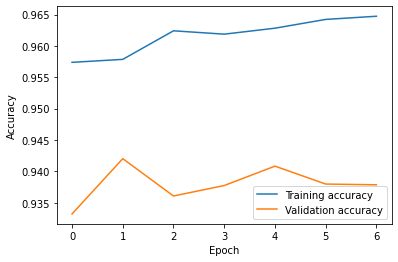

In [ ]:
plot_history(history)

In [ ]:
pred_test = model.predict(X_test)
print(pred_test.shape)
print(pred_test[0])
print(np.argmax(pred_test[0]))

(28000, 10)
[1.0531901e-08 8.9284091e-09 9.9873573e-01 9.7833225e-04 1.8477014e-08
 2.5927476e-04 5.0759940e-08 5.5790802e-06 1.7178583e-05 3.8816179e-06]
2


In [ ]:
test_id = np.arange(1, test.shape[0] + 1, 1)
predictions = np.argmax(pred_test, axis = 1)

sub = pd.DataFrame(data = {'ImageId': test_id,
                           'Label': predictions})
sub.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
